In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_types = {
    'PD_DESC': 'category',
    'OFNS_DESC': 'category',
    'LAW_CODE': 'category',
    'LAW_CAT_CD': 'category',
    'ARREST_BORO': 'category',
    'ARREST_PRECINCT': 'category',
    'JURISDICTION_CODE': 'category',
    'AGE_GROUP': 'category',
    'PERP_SEX': 'category',
    'PERP_RACE': 'category'
}

df = pd.read_csv('NYPD_arrest_data_2022-2023.csv', dtype=data_types)

In [3]:
df.head()

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,2022-10-16,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,Felony,Brooklyn,76,2.0,25-44,Male,BLACK,40.676869,-74.006640,POINT (-74.00664 40.676869)
1,2022-04-12,"CONTROLLED SUBSTANCE,INTENT TO",117.0,DANGEROUS DRUGS,PL 2201602,Felony,Manhattan,14,0.0,18-24,Male,BLACK,40.753533,-73.994537,POINT (-73.9945368920152 40.7535327012632)
2,2022-03-19,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,Misdemeanor,Brooklyn,60,0.0,25-44,Male,WHITE,40.582620,-73.986223,POINT (-73.986223 40.58262)
3,2022-08-24,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,Felony,Brooklyn,84,0.0,18-24,Male,WHITE HISPANIC,40.690115,-73.989019,POINT (-73.989019 40.690115)
4,2022-01-07,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,Felony,Manhattan,24,2.0,25-44,Male,BLACK,40.796074,-73.967067,POINT (-73.9670667458109 40.7960743128304)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412713 entries, 0 to 412712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ARREST_DATE        412713 non-null  object  
 1   PD_DESC            412713 non-null  category
 2   KY_CD              412713 non-null  float64 
 3   OFNS_DESC          412713 non-null  category
 4   LAW_CODE           412713 non-null  category
 5   LAW_CAT_CD         412713 non-null  category
 6   ARREST_BORO        412713 non-null  category
 7   ARREST_PRECINCT    412713 non-null  category
 8   JURISDICTION_CODE  412713 non-null  category
 9   AGE_GROUP          412713 non-null  category
 10  PERP_SEX           412713 non-null  category
 11  PERP_RACE          412713 non-null  category
 12  Latitude           412713 non-null  float64 
 13  Longitude          412713 non-null  float64 
 14  Lon_Lat            412713 non-null  object  
dtypes: category(10), float64(3), objec

In [5]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [6]:
df['ARREST_MONTH'] = df['ARREST_DATE'].dt.month
unique_months = df['ARREST_MONTH'].unique()
unique_months.sort()
print("Unique months listed in the ARREST_DATE column:")
print(unique_months)


Unique months listed in the ARREST_DATE column:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [7]:
df['LAW_CAT_CD'].unique()

['Felony', 'Misdemeanor', 'Violation', 'Traffic', 'Unclassified Violation']
Categories (5, object): ['Felony', 'Misdemeanor', 'Traffic', 'Violation', 'Unclassified Violation']

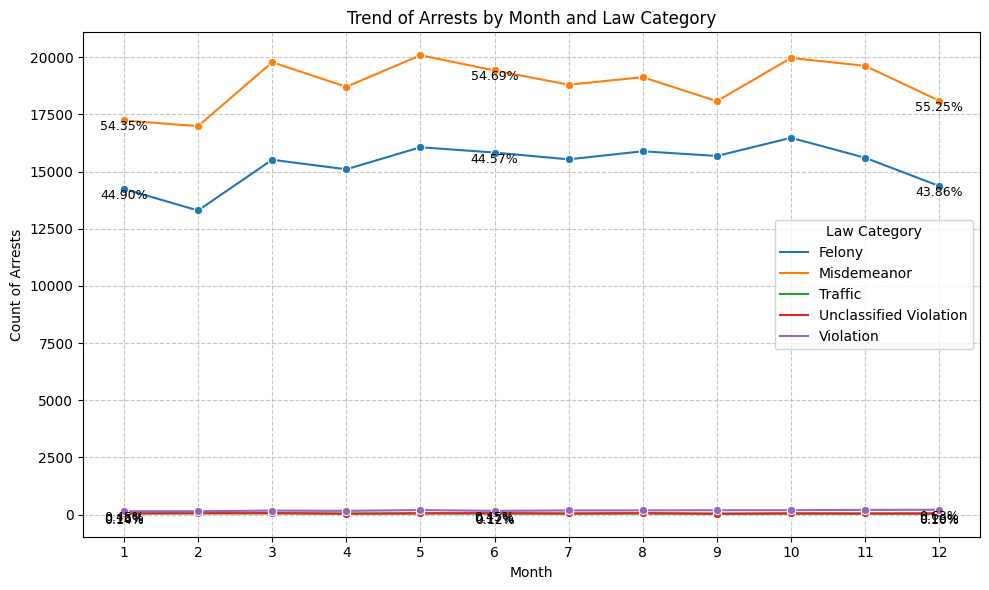

In [22]:
agg_df = filtered_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
plt.title('Trend of Arrests by Month and Law Category')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(months)  # Set x-axis ticks to match the selected months
plt.legend(title='Law Category')
total_counts = agg_df.groupby('ARREST_MONTH')['count'].sum()
months_of_interest = [1, 6, 12]
for month in months_of_interest:
    total_count = total_counts.loc[month]
    subset_df = agg_df[agg_df['ARREST_MONTH'] == month]
    for _, row in subset_df.iterrows():
        percentage = (row['count'] / total_count) * 100
        plt.text(row['ARREST_MONTH'], row['count'], f'{percentage:.2f}%', ha='center', va='top', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
df.loc[df['LAW_CAT_CD'] == 'Unclassified Violation']

,ARREST_DATE,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat,ARREST_MONTH
170903,2023-01-05,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,102,0.0,25-44,Male,WHITE,40.712206,-73.825952,POINT (-73.825952 40.712206),1
171786,2023-01-12,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,113,3.0,25-44,Male,BLACK,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),1
173447,2023-02-01,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,102,0.0,25-44,Female,WHITE,40.712206,-73.825952,POINT (-73.825952 40.712206),2
176724,2023-02-22,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,102,0.0,25-44,Male,BLACK,40.712206,-73.825952,POINT (-73.825952 40.712206),2
176965,2023-03-02,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,102,0.0,25-44,Female,BLACK,40.713859,-73.830768,POINT (-73.830768 40.713859),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410955,2023-12-26,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,113,3.0,25-44,Female,ASIAN / PACIFIC ISLANDER,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),12
411294,2023-12-12,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,113,3.0,25-44,Male,WHITE HISPANIC,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),12
411357,2023-11-07,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Manhattan,5,0.0,25-44,Female,BLACK,40.714957,-74.005654,POINT (-74.005654 40.714957),11
411525,2023-12-11,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,Unclassified Violation,Queens,113,3.0,25-44,Male,WHITE HISPANIC,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),12


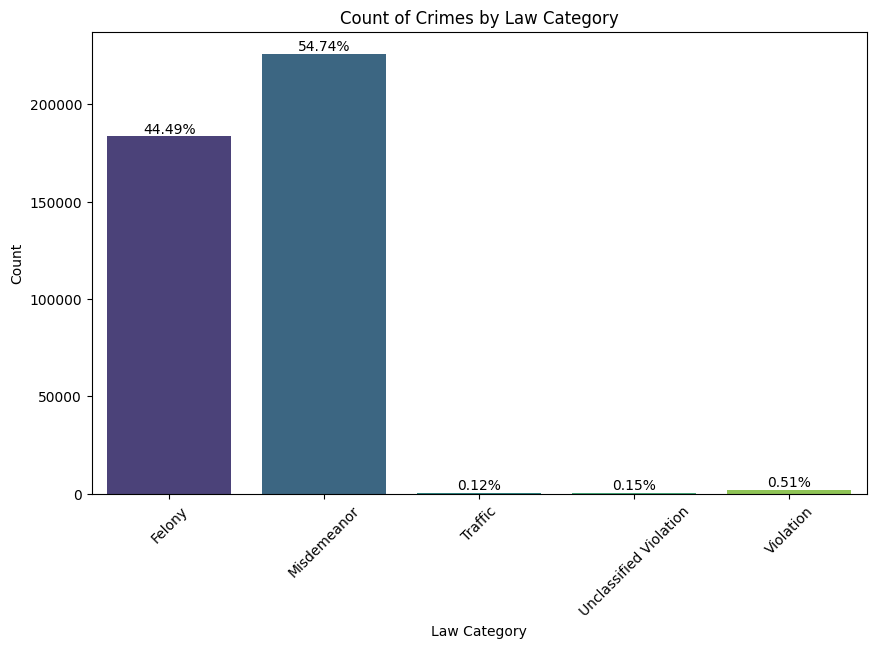

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='LAW_CAT_CD', order=law_cat_order, palette='viridis')
total_count = df.shape[0]
for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Crimes by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


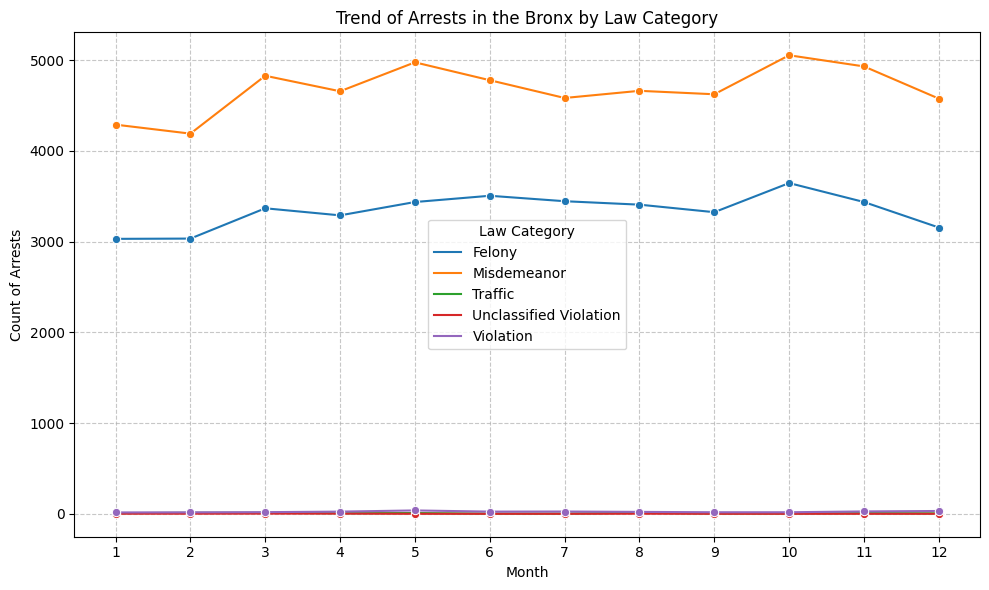

In [29]:
bronx_df = filtered_df[filtered_df['ARREST_BORO'] == 'Bronx']
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
plt.title('Trend of Arrests in the Bronx by Law Category')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(months)
plt.legend(title='Law Category')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


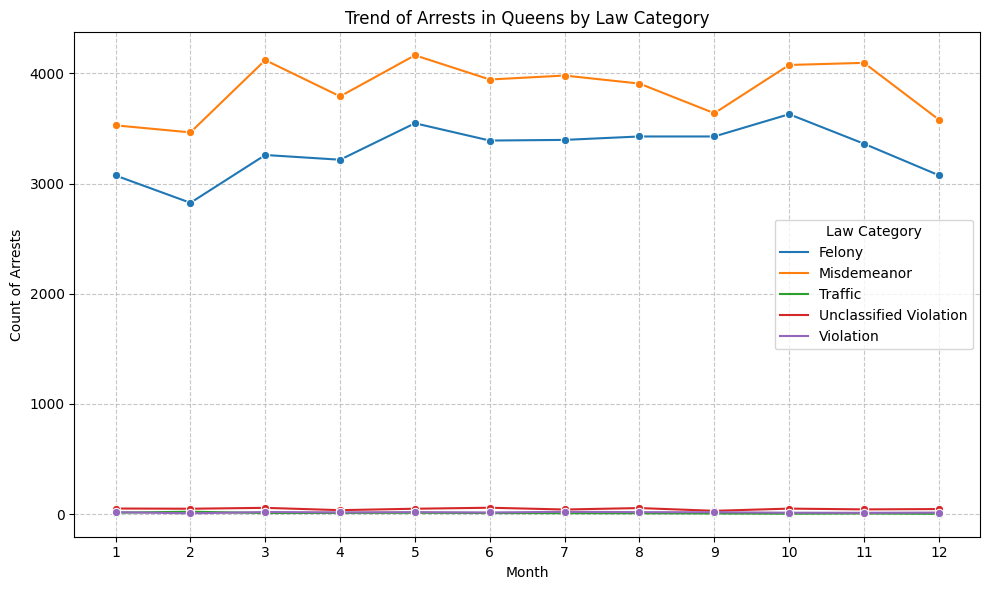

In [28]:
bronx_df = filtered_df[filtered_df['ARREST_BORO'] == 'Queens']
agg_df = bronx_df.groupby(['ARREST_MONTH', 'LAW_CAT_CD']).size().reset_index(name='count')
law_cat_order = ['Felony', 'Misdemeanor', 'Traffic', 'Unclassified Violation', 'Violation']
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='ARREST_MONTH', y='count', hue='LAW_CAT_CD', hue_order=law_cat_order, marker='o')
plt.title('Trend of Arrests in Queens by Law Category')
plt.xlabel('Month')
plt.ylabel('Count of Arrests')
plt.xticks(months) 
plt.legend(title='Law Category')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
